In [4]:
import os
import sys
# CaLRepo = os.environ.get("CaLRepo")
CaLRepo ='/home/zyq0416/workspace/CaL'
# print(CaLRepo)
sys.path.append(f"{CaLRepo}/utilities/")

import numpy as np
import pandas as pd
import proplot as pplot
import matplotlib.pyplot as plt
import json

from pyBraytonHeatPump import BraytonHeatPump

%load_ext autoreload
%autoreload 2

/home/zyq0416/workspace/CaL/.venv/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zyq0416/workspace/CaL/.venv/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0, flags=flags)


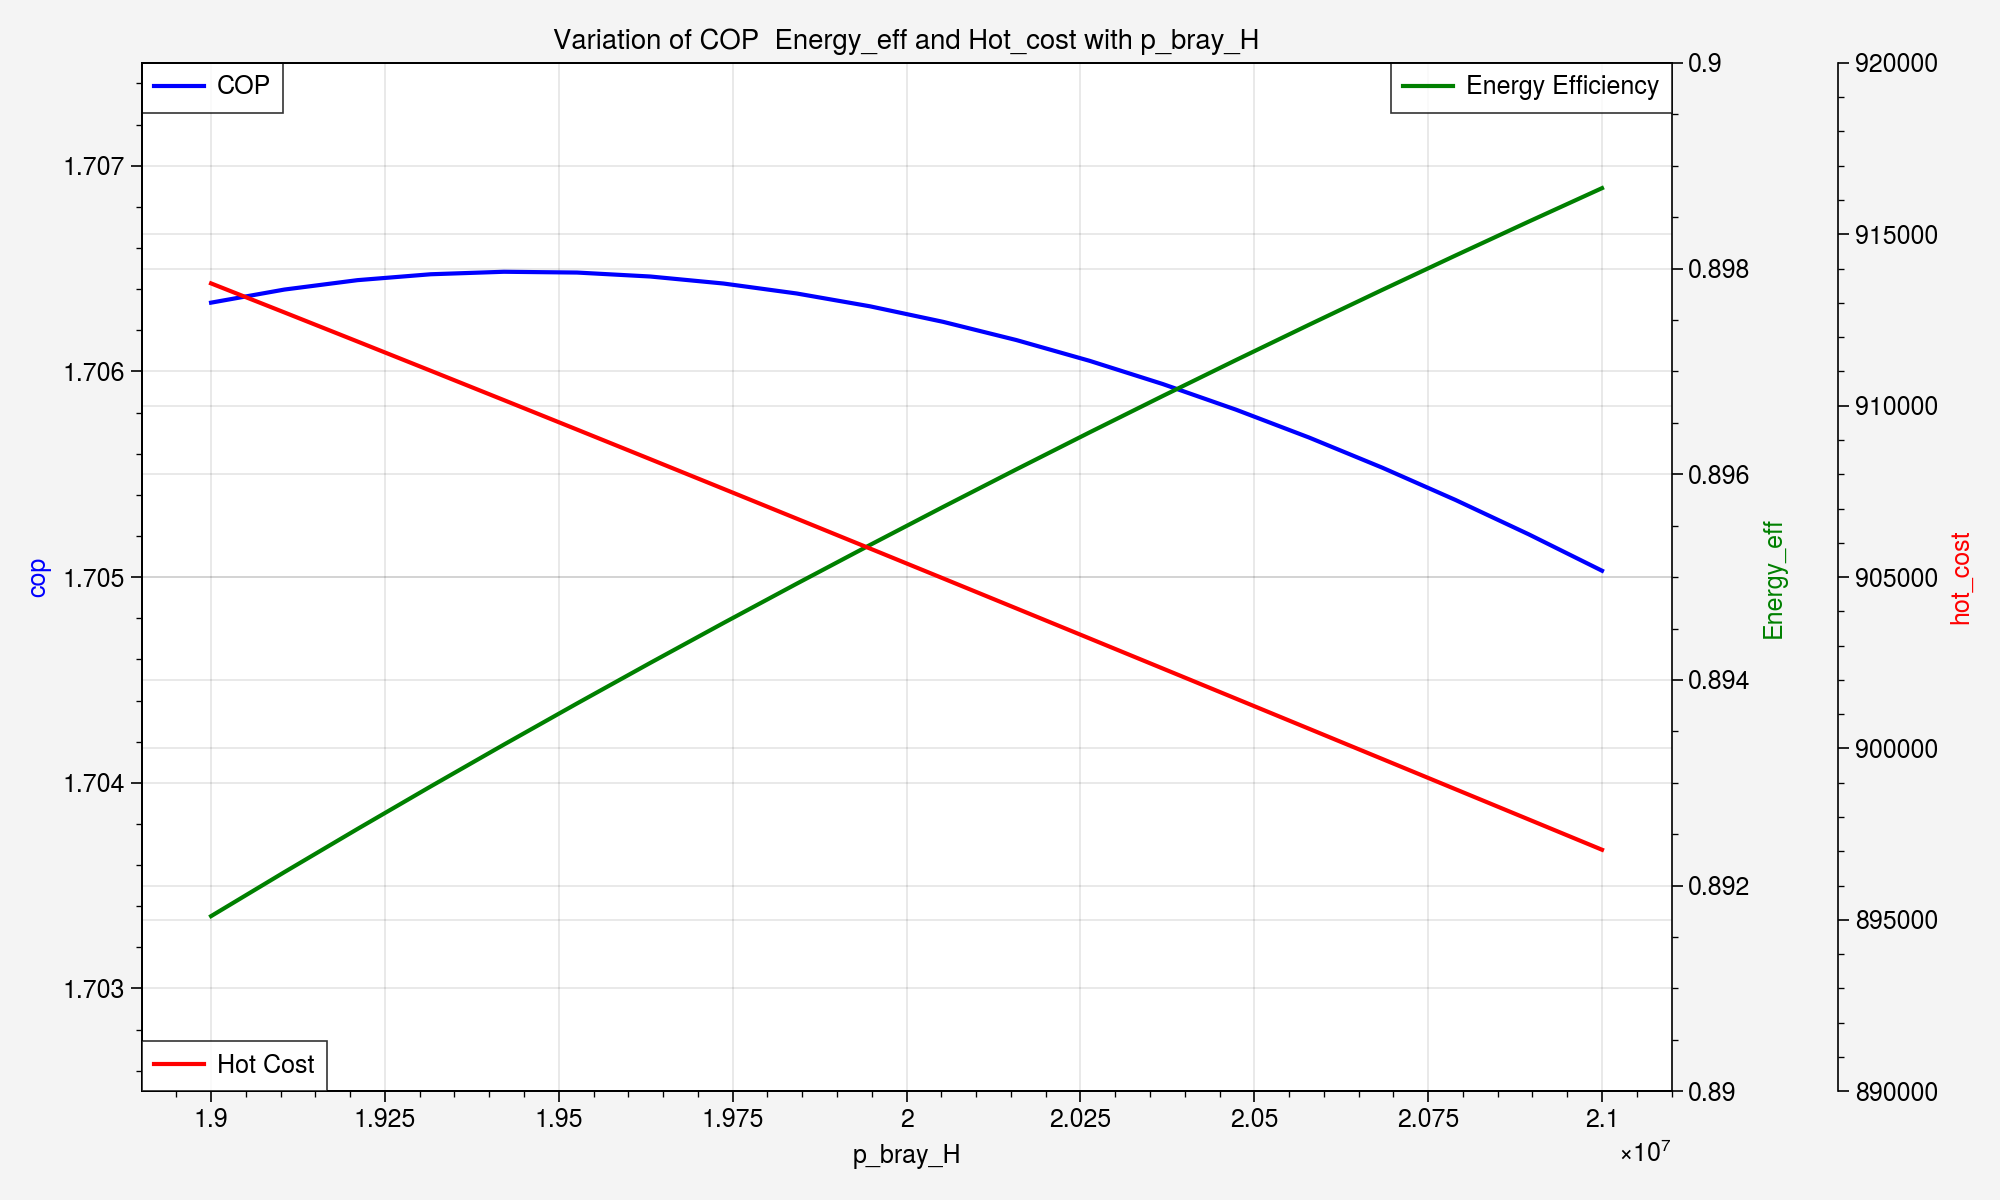

In [5]:
parameters = {}
flue_gas_composistion = dict()
flue_gas_composistion["co2"] = 0.1338
flue_gas_composistion["o2"] = 0.0384
flue_gas_composistion["n2"] = 0.6975
parameters["flue_gas_composition"] = flue_gas_composistion
parameters["isentropic_eff_mc"] = 0.88  #等熵效率
parameters["t_isentropic_eff_mc"] = 0.92
parameters["mechanical_eff"] = 0.98   #机械效率
parameters["min_temperature_exchange"] = 15
parameters["industrial_waste_heat_t"] =300 #℃
parameters["heat_transfer_loss_eff"] = 0.96
parameters["t_reaction"] = 525

parameters["p_bray_L"] = 7.5e6
parameters["T_amb"] = 20
parameters["p_amb"] = 101325
bh=BraytonHeatPump(parameters)
p_bray_H_values = np.linspace(19e6, 21e6, 20)
# Initialize lists to store results
cop_values = []
energy_eff_values = []
hot_cost_values = []

# Iterate over p_bray_H values
for p_bray_H in p_bray_H_values:
    # Update input dictionary
    input={}
    input["p_bray_H"] = p_bray_H
    input["p_bray_M"] = 12827110.4341202
    input["Store_electrical_power"]=1e6 #1MW
    # Solve the problem
    results = bh.solve(input)
    
    # Extract the required results
    cop = results["cop"]
    energy_eff = results["energy_eff"]
    hot_cost = results["evaluation_indicators"]["hot_cost"]

    # Append the results to the respective lists
    cop_values.append(cop)
    energy_eff_values.append(energy_eff)
    hot_cost_values.append(hot_cost)

# Plot the curves
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# Set y-axis limits for each curve
ax1.set_ylim(1.7025, 1.7075)
ax2.set_ylim(0.89, 0.9)
ax3.set_ylim(890000, 920000)

# Plot the curves with different y-axes
ax1.plot(p_bray_H_values, cop_values, label="COP", color='blue')
ax2.plot(p_bray_H_values, energy_eff_values, label="Energy Efficiency", color='green')
ax3.plot(p_bray_H_values, hot_cost_values, label="Hot Cost", color='red')

# Set labels and title
ax1.set_xlabel("p_bray_H")
ax1.set_ylabel("cop", color='blue')
ax2.set_ylabel("Energy_eff", color='green')
ax3.set_ylabel("hot_cost", color='red')
plt.title("Variation of COP 、Energy_eff and Hot_cost with p_bray_H")

# Show legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='lower left')

# Remove spines for the extra axes
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_position(('outward', 60))

# Adjust spacing between subplots
fig.tight_layout()

plt.grid(True)
plt.show()

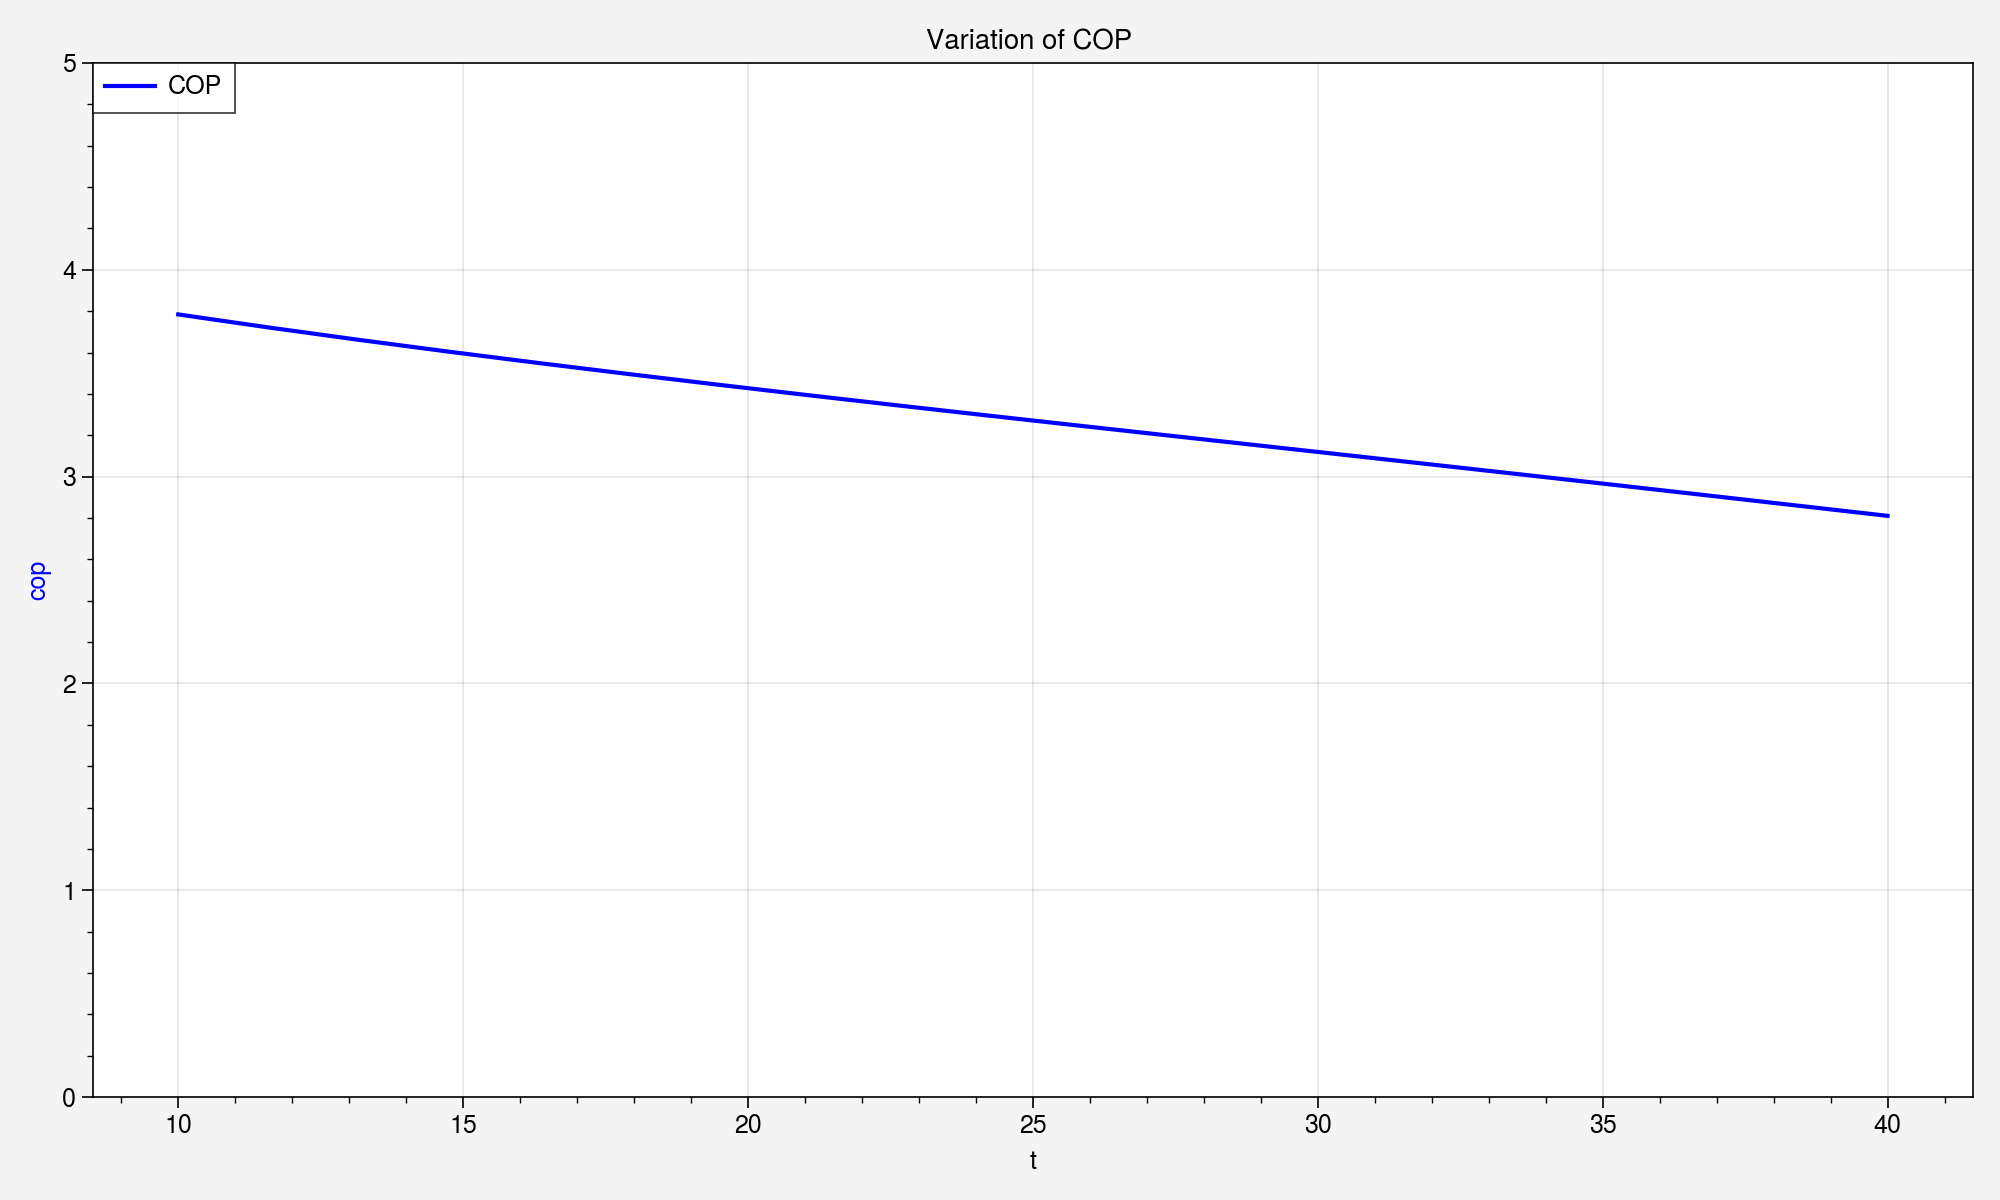

In [15]:
parameters = {}
flue_gas_composistion = dict()
flue_gas_composistion["co2"] = 0.1338
flue_gas_composistion["o2"] = 0.0384
flue_gas_composistion["n2"] = 0.6975
parameters["flue_gas_composition"] = flue_gas_composistion
parameters["isentropic_eff_mc"] = 0.88  #等熵效率
parameters["t_isentropic_eff_mc"] = 0.92
parameters["mechanical_eff"] = 0.98   #机械效率
parameters["min_temperature_exchange"] = 15
parameters["industrial_waste_heat_t"] =16 #℃
parameters["heat_transfer_loss_eff"] = 0.96
#parameters["t_reaction"] = 525

parameters["p_bray_L"] = 2e6
parameters["T_amb"] = 20
parameters["p_amb"] = 101325
#bh=BraytonHeatPump(parameters)
t_reaction_values = np.linspace(10, 40, 20)
# Initialize lists to store results
cop_values = []


# Iterate over p_bray_H values
for t_reaction in t_reaction_values:
    # Update input dictionary
    parameters["t_reaction"] = t_reaction
    bh=BraytonHeatPump(parameters)
    input={}
    input["p_bray_H"] = 12.5e6
    input["p_bray_M"] = 5.5e6
    input["Store_electrical_power"]=1e6 #1MW
    # Solve the problem
    results = bh.solve(input)
    
    # Extract the required results
    cop = results["cop"]


    # Append the results to the respective lists
    cop_values.append(cop)

# Plot the curves
fig, ax1 = plt.subplots(figsize=(10, 6))


# Set y-axis limits for each curve
ax1.set_ylim(0, 5)

# Plot the curves with different y-axes
ax1.plot(t_reaction_values, cop_values, label="COP", color='blue')


# Set labels and title
ax1.set_xlabel("t")
ax1.set_ylabel("cop", color='blue')
plt.title("Variation of COP ")

# Show legends
ax1.legend(loc='upper left')

# Adjust spacing between subplots
fig.tight_layout()

plt.grid(True)
plt.show()